<a href="https://colab.research.google.com/github/ashishpatel26/Imarticus_Python/blob/main/CarDekho_PricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
np.random.seed(2021) # for choose same data for Model training

In [ ]:
data = pd.read_csv('/content/car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])

Number of Rows: 301
Number of Columns: 9


In [ ]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [ ]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
data.describe(include='O')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [ ]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


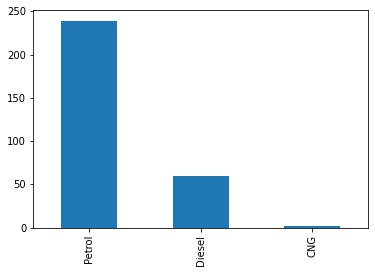

In [ ]:
data["Fuel_Type"].value_counts().plot(kind="bar")
plt.show()

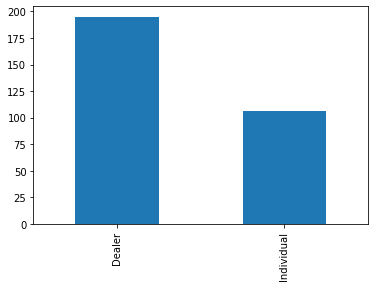

In [ ]:
data["Seller_Type"].value_counts().plot(kind="bar")
plt.show()

In [ ]:
data["Car_Name"].value_counts().to_frame()

,Car_Name
city,26
corolla altis,16
verna,14
fortuner,11
brio,10
...,...
Yamaha FZ 16,1
omni,1
Hero Honda Passion Pro,1
s cross,1


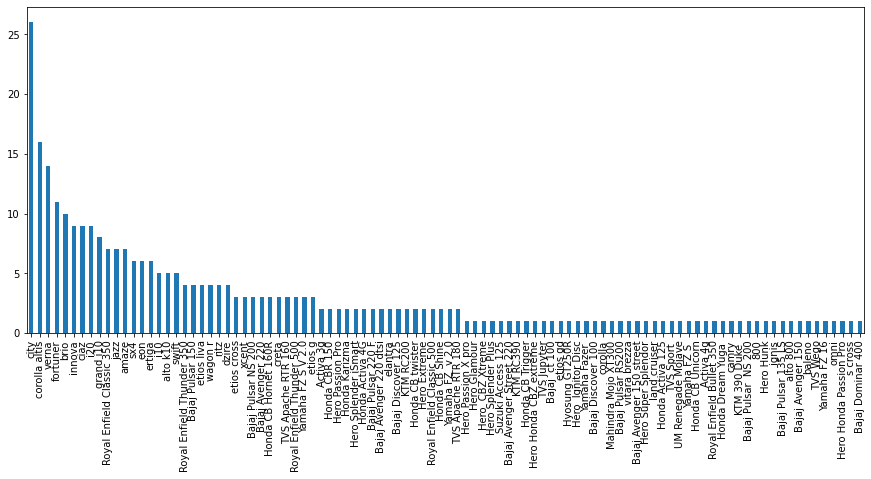

In [ ]:
data["Car_Name"].value_counts().plot(kind="bar", figsize=(15,6))
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
pd.get_dummies(data["Transmission"])

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
296,0,1
297,0,1
298,0,1
299,0,1


In [ ]:
le = LabelEncoder()
data["Car_Name"] = le.fit_transform(data["Car_Name"])
data["Fuel_Type"] = le.fit_transform(data["Fuel_Type"])
data["Seller_Type"] = le.fit_transform(data["Seller_Type"])
data["Transmission"] = le.fit_transform(data["Transmission"])

In [ ]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988,1,0,1,0
297,66,2015,4.00,5.90,60000,2,0,1,0
298,69,2009,3.35,11.00,87934,2,0,1,0
299,69,2017,11.50,12.50,9000,1,0,1,0


In [ ]:
y = data.pop('Selling_Price')
X = data

In [ ]:
X.shape, y.shape

((301, 8), (301,))

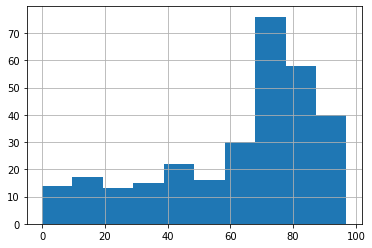

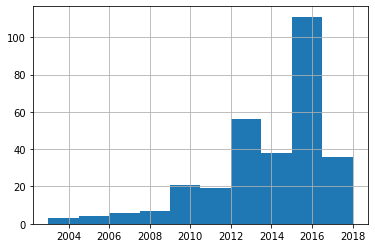

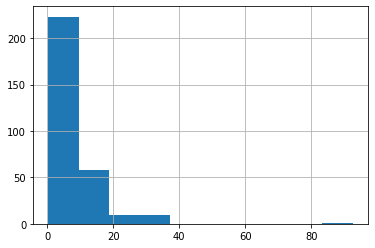

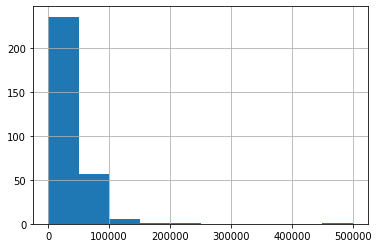

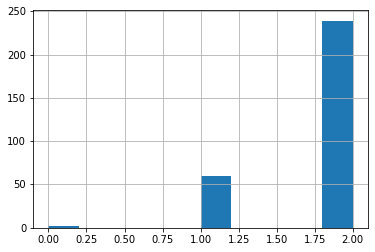

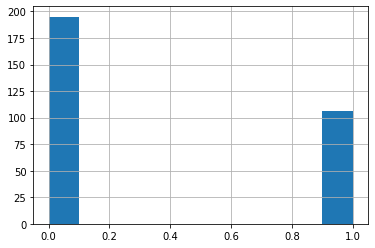

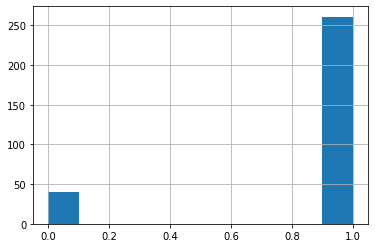

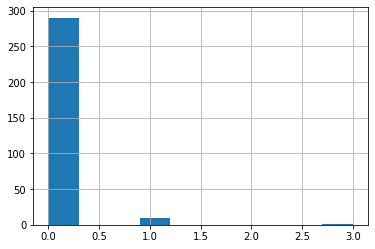

In [ ]:
for i in X.columns:
  X[i].hist()
  plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X_sc, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import *

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
print("Training R Score : ",mlr.score(X_train, y_train))
print("Testing R Score: ", mlr.score(X_test, y_test))
print("RMSE :", rmse(y_test, mlr.predict(X_test)))

Training R Score :  0.8840630578239456
Testing R Score:  0.8465539666864553
RMSE : 1.8800848570469972


In [ ]:
mlrhr = LinearRegression(normalize=True)
mlrhr.fit(X_tr, y_tr)
print("Training R Score : ",mlrhr.score(X_tr, y_tr))
print("Testing R Score: ", mlrhr.score(X_te, y_te))
print("RMSE :", rmse(y_te, mlrhr.predict(X_te)))

Training R Score :  0.8840630578239453
Testing R Score:  0.8465539666857804
RMSE : 1.8800848570511324


In [ ]:
?Ridge

In [ ]:
model = Ridge({'alpha': 1.0, 'tol': 0.001})
parameters = {'alpha':[0.2,0.4,0.6,0.8,1.0], 'tol':[0.001,0.002,0.003,0.004,0.005]}
clf = GridSearchCV(model,parameters, n_jobs=-1)
clf.fit(X_tr, y_tr)
print(clf.score(X_te, y_te), "<= Score")
print(rmse(y_te, clf.predict(X_te)), "<= RMSE")

0.8461140919662942 <= Score
1.8827776929292643 <= RMSE


In [ ]:
clf.best_params_

model = Ridge(alpha =  1.0, tol =  0.001)
model.fit(X_tr, y_tr)
model.score(X_te,y_te)

0.8461140919662942

In [ ]:
model = Lasso()
parameters = {'alpha':[0.2,0.4,0.6,0.8,1.0], 'tol':[0.0001,0.0002,0.0003,0.0004,0.0005]}
clf = GridSearchCV(model,parameters, n_jobs=-1)
clf.fit(X_tr, y_tr)
print(clf.score(X_te, y_te), "<= Score")
print(rmse(y_te, clf.predict(X_te)), "<= RMSE")

0.8315372371153578 <= Score
1.9699335554659683 <= RMSE


In [ ]:
model = LassoLars()
parameters = {'alpha':[0.2,0.4,0.6,0.8,1.0]}
clf = GridSearchCV(model,parameters, n_jobs=-1)
clf.fit(X_tr, y_tr)
print(clf.score(X_te, y_te), "<= Score")
print(rmse(y_te, clf.predict(X_te)), "<= RMSE")

0.346551526360663 <= Score
3.879763851598909 <= RMSE


In [ ]:
model = BayesianRidge()
parameters = {'alpha_1':[0.2,0.4,0.6,0.8,1.0], 'alpha_2':[0.2,0.4,0.6,0.8,1.0]}
clf = GridSearchCV(model,parameters, n_jobs=-1)
clf.fit(X_tr, y_tr)
print(clf.score(X_te, y_te), "<= Score")
print(rmse(y_te, clf.predict(X_te)), "<= RMSE")

0.8458754202036498 <= Score
1.8842371890377925 <= RMSE


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor()
parameters = {'n_neighbors':[5,6,7,8,9,10], 'leaf_size':[30,40,50,60,70]}
clf = GridSearchCV(model,parameters, n_jobs=-1)
clf.fit(X_tr, y_tr)
print(clf.score(X_te, y_te), "<= Score")
print(rmse(y_te, clf.predict(X_te)), "<= RMSE")

0.9259264685376358 <= Score
1.3062645577055472 <= RMSE


In [ ]:
clf.best_params_

{'leaf_size': 30, 'n_neighbors': 6}

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
parameters = {'max_depth':[5,6,7,8,9,10], 'min_samples_split':[2,3,4]}
clf = GridSearchCV(model,parameters, n_jobs=-1)
clf.fit(X_tr, y_tr)
print(clf.score(X_te, y_te), "<= Score")
print(rmse(y_te, clf.predict(X_te)), "<= RMSE")

0.9633799040540416 <= Score
0.9184581184268904 <= RMSE


In [ ]:
clf.best_params_

{'max_depth': 9, 'min_samples_split': 2}

In [ ]:
from sklearn.tree import ExtraTreeRegressor
model = ExtraTreeRegressor()
parameters = {
    'max_depth':[5,6,7,8,9,10,20,30], 
    'min_samples_split':[2,3,4,5,6,7,8,9,10]}
clf = GridSearchCV(model,parameters, n_jobs=-1)
clf.fit(X_tr, y_tr)
print(clf.score(X_te, y_te), "<= Score")
print(rmse(y_te, clf.predict(X_te)), "<= RMSE")

0.8721918585001227 <= Score
1.715848258413791 <= RMSE


In [ ]:
clf.best_params_

{'max_depth': 30, 'min_samples_split': 3}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
parameters = {'max_depth':[5,6,7,8,9,10], 'min_samples_split':[2,3,4], 'min_samples_leaf' : [1,2,3,4,5]}
clf = GridSearchCV(model,parameters, n_jobs=-1)
clf.fit(X_tr, y_tr)
print(clf.score(X_te, y_te), "<= Score")
print(rmse(y_te, clf.predict(X_te)), "<= RMSE")

0.9613237874646264 <= Score
0.9438904400317384 <= RMSE


In [ ]:
clf.best_params_

{'max_depth': 8, 'min_samples_split': 2}